# Introduction


This example shows how to implement basic neural network from Scratch.We have used Cifar-10 dataset. The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works.

CIFAR-10 is a labeled subset of the 80 million tiny images dataset. When the dataset was created, students were paid to label all of the images.[5]

Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

# Setup
We have to import necessary libraries.


In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Input, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load the data

In [2]:
#Datasets splitting 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

(x_train, y_train), _ = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# Scaling Training Dataset

In [4]:
x_train/2

array([[[[ 29.5,  31. ,  31.5],
         [ 21.5,  23. ,  22.5],
         [ 25. ,  24. ,  21.5],
         ...,
         [ 79. ,  66. ,  54. ],
         [ 76. ,  62.5,  51. ],
         [ 74. ,  62. ,  51.5]],

        [[  8. ,  10. ,  10. ],
         [  0. ,   0. ,   0. ],
         [  9. ,   4. ,   0. ],
         ...,
         [ 61.5,  44. ,  27.5],
         [ 59.5,  41.5,  25. ],
         [ 61. ,  43.5,  28.5]],

        [[ 12.5,  12. ,  10.5],
         [  8. ,   3.5,   0. ],
         [ 24.5,  13.5,   4. ],
         ...,
         [ 59. ,  42. ,  25. ],
         [ 60. ,  42. ,  25. ],
         [ 54.5,  36.5,  21. ]],

        ...,

        [[104. ,  85. ,  48. ],
         [100.5,  76.5,  17. ],
         [ 99. ,  80.5,  13. ],
         ...,
         [ 80. ,  66.5,  35. ],
         [ 28. ,  15.5,   3.5],
         [ 26.5,  17. ,  10. ]],

        [[ 90. ,  69.5,  48. ],
         [ 86.5,  61.5,  21. ],
         [ 93. ,  72. ,  15. ],
         ...,
         [ 92. ,  74. ,  47. ],
         [ 4

# Showing shape of Dataset

In [5]:
x_train[0].shape

(32, 32, 3)

# Data Visulization

Here are the first 9 images in the training dataset

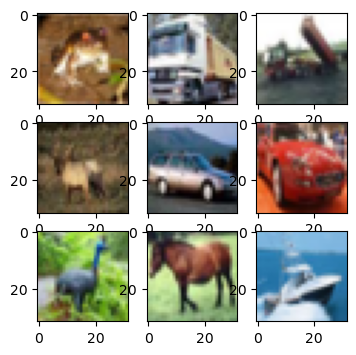

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#first we make a canvas for visualization
fig = plt.figure(figsize=(4, 4))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    
plt.show()

# Components of Nueral Network
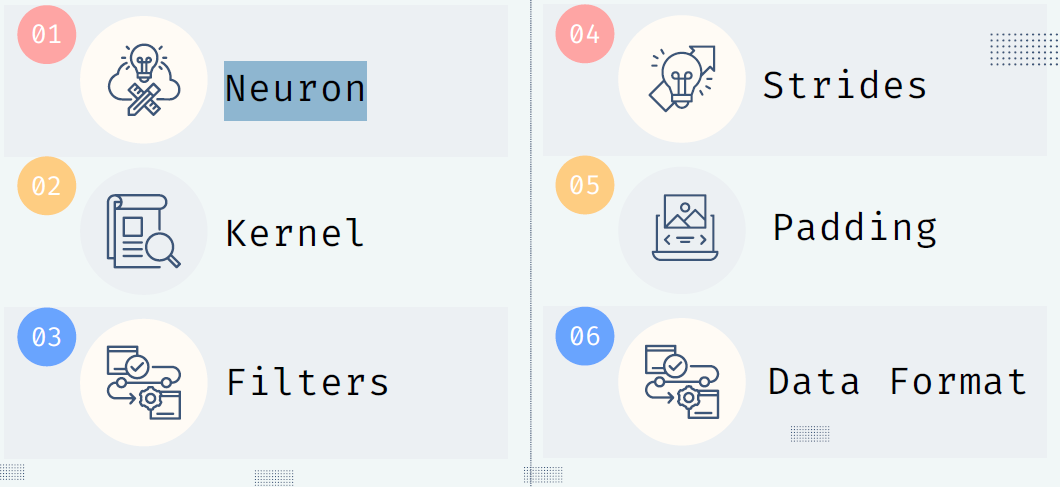


# Neurons
Neurons are a critical component of any deep learning model.The origin of deep learning neurons were inspired by the biology of the human brain.

Neuron in Biology
Neurons in deep learning were inspired by neurons in the human brain. Here is a diagram of the anatomy of a brain neuron:

The anatomy of a neuron in the brain

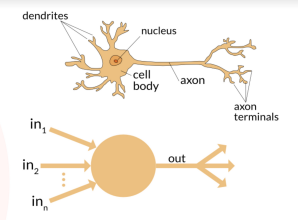

As you can see, neurons have quite an interesting structure. Groups of neurons work together inside the human brain to perform the functionality that we require in our day-to-day lives.

The question that Geoffrey Hinton asked during his seminal research in neural networks was whether we could build computer algorithms that behave similarly to neurons in the brain. The hope was that by mimicking the brain's structure, we might capture some of its capability.

To do this, researchers studied the way that neurons behaved in the brain. One important observation was that a neuron by itself is useless. Instead, you require networks of neurons to generate any meaningful functionality.

This is because neurons function by receiving and sending signals. More specifically, the neuron's dendrites receive signals and pass along those signals through the axon.

The dendrites of one neuron are connected to the axon of another neuron. These connections are called synapses - which is a concept that has been generalized to the field of deep learning.

Neuron in Deep Learning
Neurons in deep learning models are nodes through which data and computations flow.

Neurons work like this:

They receive one or more input signals. These input signals can come from either the raw data set or from neurons positioned at a previous layer of the neural net. They perform some calculations. They send some output signals to neurons deeper in the neural net through a synapse. Here is a diagram of the functionality of a neuron in a deep learning neural net:


Let's walk through this diagram step-by-step.

As you can see, neurons in a deep learning model are capable of having synapses that connect to more than one neuron in the preceding layer. Each synapse has an associated weight, which impacts the preceding neuron's importance in the overall neural network.

Weights are a very important topic in the field of deep learning because adjusting a model's weights is the primary way through which deep learning models are trained. You'll see this in practice later on when we build our first neural networks from scratch.

Once a neuron receives its inputs from the neurons in the preceding layer of the model, it adds up each signal multiplied by its corresponding weight and passes them on to an activation function, like this:

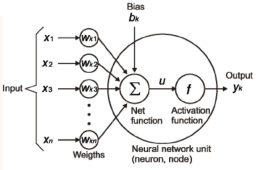

The activation function calculates the output value for the neuron. This output value is then passed on to the next layer of the neural network through another synapse.

This serves as a broad overview of deep learning neurons. Do not worry if it was a lot to take in - we'll learn much more about neurons in deep learning throughout this course. For now, it's sufficient for you to have a high-level understanding of how they are structured in a deep learning model.

# Kernel
In Convolutional neural network, the kernel is
nothing but a filter that is used to extract the
features from the images. The kernel is a matrix
that moves over the input data, performs the
dot product with the sub-region of input data,
and gets the output as the matrix of dot
products.
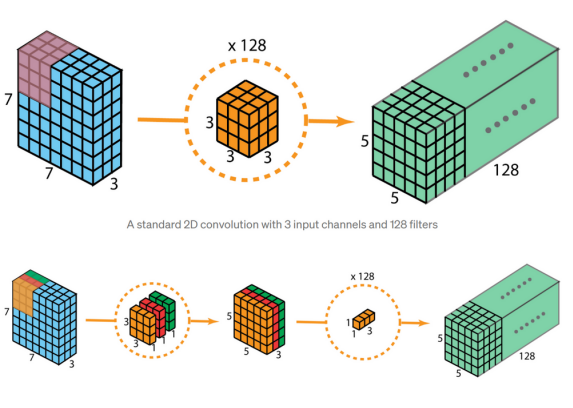

# Filter
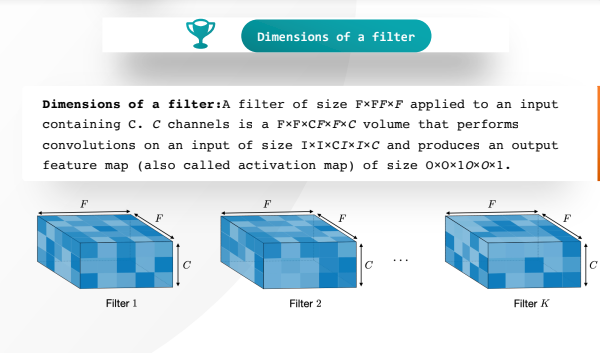

# Strides

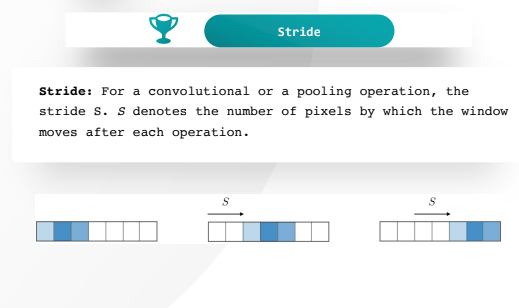

# padding

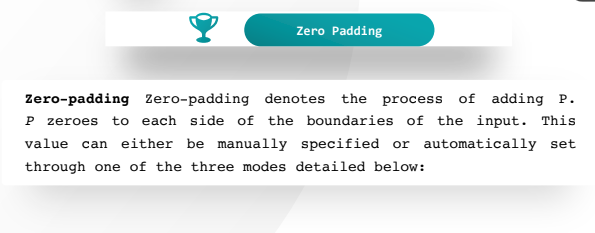

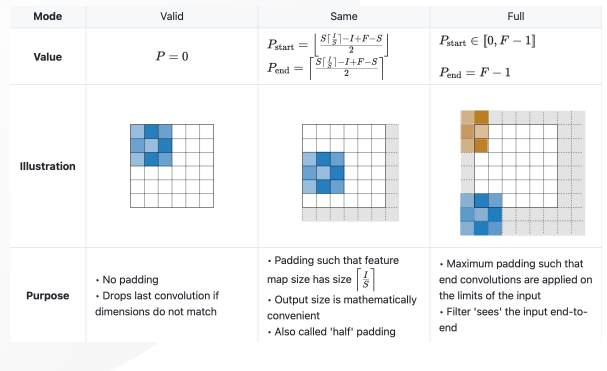

# Layer of Neural Network
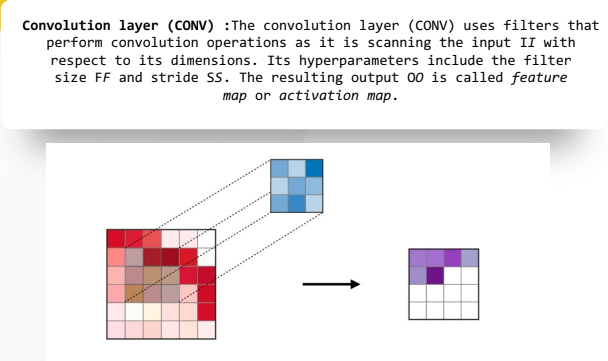
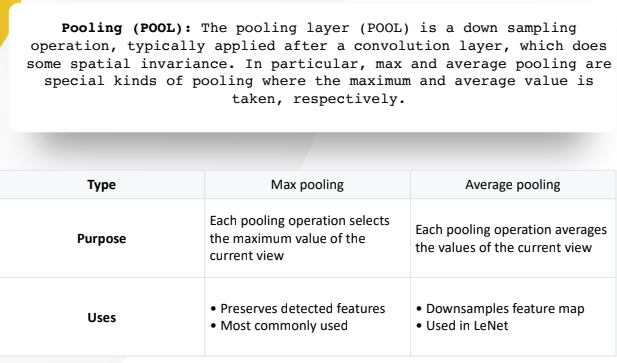

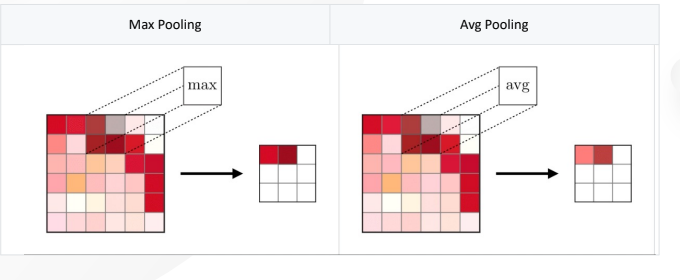

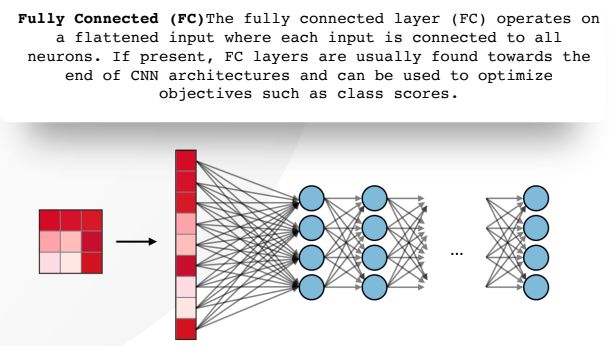

# Build A Model

In [7]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3), 
                 
                 strides = (1, 1), 
                 #strides = (2, 2),
                 padding = "valid" 
                 # padding= "same"
                ))

model.output_shape

(None, 30, 30, 10)

In [8]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3), 
                 
                 strides = (1, 1), 
                 #strides = (2, 2),
                 padding = "valid" 
                 # padding= "same"
                ))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.output_shape

(None, 15, 15, 10)

In [9]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10,
                 kernel_size = (3, 3), 
                 
                 strides = (1, 1),
                 #strides = (2, 2),
                 padding = "valid" 
                ))

model.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
model.output_shape

(None, 15, 15, 10)

In [10]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10,
                 kernel_size = (3, 3),
                 
                 strides = (1, 1),
                 #strides = (2, 2),
                 padding = "valid" 
                ))

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
model.output_shape

(None, 15, 15, 10)

In [11]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "valid", strides  =(1, 1)))
model.output_shape

(None, 29, 29, 10)

In [12]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "valid", strides  =(2, 2)))
model.output_shape

(None, 15, 15, 10)

In [13]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "same", strides  =(1, 1)))
model.output_shape

(None, 30, 30, 10)

In [14]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "same"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "same", strides  =(1, 1)))
model.output_shape

(None, 32, 32, 10)

In [15]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(GlobalAveragePooling2D()) #ignore all the properties except filtering value
model.output_shape

(None, 10)

In [16]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten()) #converting multi-dimensional data into single dimensional data(FCNN- Fully connected neural network)
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)


In [17]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "same"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)

(None, 32, 32, 10)
(None, 10240)


In [18]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (2, 2),
                 padding = "same"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)

(None, 16, 16, 10)
(None, 2560)


In [19]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (2, 2),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)

(None, 15, 15, 10)
(None, 2250)


In [20]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(10))
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)
(None, 10)


In [21]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(2)) #FCNN or dense layer
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)
(None, 2)
